# Document Processing Analysis: A Process Mining Approach

The given set of data contains information about the process of document processing. The process of processing documents contains the following activities: Receiving a Document, Creating a new Case, Investing Document into a new Case and so on. The data set contains information about the event name, event type, time of the event's execution and the participant whose execution the event is related to.

https://doi.org/10.4121/uuid:6df27e59-6221-4ca2-9cc4-65c66588c6eb

### Contributors
University of Sarajevo, Faculty of Electrical Engineering

### Publisher
4TU.Centre for Research Data

This document was gotten from [here](https://data.4tu.nl/articles/dataset/Document_Processing_Event_Logs/12703232)

The file contains data about a document processing process. The data is grouped into process instances and the file contains 18352 process instances.

Each event has a set of attributes that describes the event, and those attributes are the following:

1. case: This is the unique ID of a document/process
2. event: This shows the name of the event that was executed. e.g., register, receiving a document, etc
3. startTime: The time when the event started
4. completeTime: The time when the event was completed
5. description: The description of the event carried out. All events are real process instance
6. org:resource: The anonymised group that has executed the activity. Automatic activities are marked as System while human activities are indicated by their groups i.e., group 1, group 2, etc.

In [1]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Document Processing Event Logs.csv")
df['startTime'] = pd.to_datetime(df['startTime'])
df['completeTime'] = pd.to_datetime(df['completeTime'])
df

,case,event,startTime,completeTime,description,org:resource
0,1,Register,2016-07-11 09:00:34,2016-07-11 09:00:34,Real process instance,System
1,1,Receiving a Document,2016-07-11 09:00:34,2016-07-11 09:02:27,Real process instance,group1
2,1,Creating a new Case,2016-07-11 09:02:27,2016-07-11 09:06:21,Real process instance,group1
3,1,Investing Document into a new Case,2016-07-11 09:06:21,2016-07-11 09:12:48,Real process instance,group2
4,1,Marking Case,2016-07-11 09:12:48,2016-07-11 09:13:36,Real process instance,group3
...,...,...,...,...,...,...
149688,18352,Marking Case,2016-08-31 17:13:16,2016-08-31 17:14:29,Real process instance,group3
149689,18352,Work on the Case,2016-08-31 17:14:29,2016-08-31 17:22:53,Real process instance,group4
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,2016-08-31 17:24:06,Real process instance,group5
149691,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,2016-08-31 17:26:37,Real process instance,group6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149693 entries, 0 to 149692
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   case          149693 non-null  int64         
 1   event         149693 non-null  object        
 2   startTime     149693 non-null  datetime64[ns]
 3   completeTime  149693 non-null  datetime64[ns]
 4   description   149693 non-null  object        
 5   org:resource  149693 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 6.9+ MB


In [4]:
df_sort = df.copy()
df_sort = df_sort.sort_values(by=['case','startTime','completeTime','event'], ascending=True).reset_index(drop=True)
df_sort

,case,event,startTime,completeTime,description,org:resource
0,1,Register,2016-07-11 09:00:34,2016-07-11 09:00:34,Real process instance,System
1,1,Receiving a Document,2016-07-11 09:00:34,2016-07-11 09:02:27,Real process instance,group1
2,1,Creating a new Case,2016-07-11 09:02:27,2016-07-11 09:06:21,Real process instance,group1
3,1,Investing Document into a new Case,2016-07-11 09:06:21,2016-07-11 09:12:48,Real process instance,group2
4,1,Marking Case,2016-07-11 09:12:48,2016-07-11 09:13:36,Real process instance,group3
...,...,...,...,...,...,...
149688,18352,Marking Case,2016-08-31 17:13:16,2016-08-31 17:14:29,Real process instance,group3
149689,18352,Work on the Case,2016-08-31 17:14:29,2016-08-31 17:22:53,Real process instance,group4
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,2016-08-31 17:24:06,Real process instance,group5
149691,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,2016-08-31 17:26:37,Real process instance,group6


In [50]:
df['event'].value_counts()

Register                                  18352
Receiving a Document                      18352
End                                       18352
Work on the Case                          17774
Confirmation of the work on the Case      17774
Creating a new Case                       13579
Investing Document into a new Case        13579
Marking Case                              13579
Generate and send an outgoing Document    13579
Placing documents in an existing Case      4773
Name: event, dtype: int64

In [5]:
new_rework = df_sort.copy()
new_rework

,case,event,startTime,completeTime,description,org:resource
0,1,Register,2016-07-11 09:00:34,2016-07-11 09:00:34,Real process instance,System
1,1,Receiving a Document,2016-07-11 09:00:34,2016-07-11 09:02:27,Real process instance,group1
2,1,Creating a new Case,2016-07-11 09:02:27,2016-07-11 09:06:21,Real process instance,group1
3,1,Investing Document into a new Case,2016-07-11 09:06:21,2016-07-11 09:12:48,Real process instance,group2
4,1,Marking Case,2016-07-11 09:12:48,2016-07-11 09:13:36,Real process instance,group3
...,...,...,...,...,...,...
149688,18352,Marking Case,2016-08-31 17:13:16,2016-08-31 17:14:29,Real process instance,group3
149689,18352,Work on the Case,2016-08-31 17:14:29,2016-08-31 17:22:53,Real process instance,group4
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,2016-08-31 17:24:06,Real process instance,group5
149691,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,2016-08-31 17:26:37,Real process instance,group6


In [6]:
new_rework['duplicates'] = new_rework.groupby(["case", "event"]).transform('cumcount')
new_rework['new_event'] = new_rework.apply(lambda x: str(x['event']) if x['duplicates'] == 0 else str(x['event']) + ' ' + 'Rework',axis=1)
new_rework

,case,event,startTime,completeTime,description,org:resource,duplicates,new_event
0,1,Register,2016-07-11 09:00:34,2016-07-11 09:00:34,Real process instance,System,0,Register
1,1,Receiving a Document,2016-07-11 09:00:34,2016-07-11 09:02:27,Real process instance,group1,0,Receiving a Document
2,1,Creating a new Case,2016-07-11 09:02:27,2016-07-11 09:06:21,Real process instance,group1,0,Creating a new Case
3,1,Investing Document into a new Case,2016-07-11 09:06:21,2016-07-11 09:12:48,Real process instance,group2,0,Investing Document into a new Case
4,1,Marking Case,2016-07-11 09:12:48,2016-07-11 09:13:36,Real process instance,group3,0,Marking Case
...,...,...,...,...,...,...,...,...
149688,18352,Marking Case,2016-08-31 17:13:16,2016-08-31 17:14:29,Real process instance,group3,0,Marking Case
149689,18352,Work on the Case,2016-08-31 17:14:29,2016-08-31 17:22:53,Real process instance,group4,0,Work on the Case
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,2016-08-31 17:24:06,Real process instance,group5,0,Confirmation of the work on the Case
149691,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,2016-08-31 17:26:37,Real process instance,group6,0,Generate and send an outgoing Document


In [7]:
new_rework['new_event'].value_counts()

Register                                       18352
Receiving a Document                           18352
End                                            18352
Creating a new Case                            13579
Investing Document into a new Case             13579
Marking Case                                   13579
Work on the Case                               13579
Confirmation of the work on the Case           13579
Generate and send an outgoing Document         13579
Placing documents in an existing Case           4773
Work on the Case Rework                         4195
Confirmation of the work on the Case Rework     4195
Name: new_event, dtype: int64

In [8]:
sort1 = df_sort.iloc[:-1,:]
sort2 = df_sort.iloc[1:,:].reset_index(drop=True)
sortnew = pd.concat([sort1,sort2],axis=1).drop(['description','completeTime'], axis=1)

sortnew.columns = ['Case','Start Event','Start Time','Start User','Case_2','End Event','End Time','End User']
sortnew['Comparison'] = sortnew.apply(lambda x: True if x['Case'] == x['Case_2'] else False,axis=1)
sortnew = sortnew[sortnew['Comparison'] == True]
sortnew

,Case,Start Event,Start Time,Start User,Case_2,End Event,End Time,End User,Comparison
0,1,Register,2016-07-11 09:00:34,System,1,Receiving a Document,2016-07-11 09:00:34,group1,True
1,1,Receiving a Document,2016-07-11 09:00:34,group1,1,Creating a new Case,2016-07-11 09:02:27,group1,True
2,1,Creating a new Case,2016-07-11 09:02:27,group1,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,True
3,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,1,Marking Case,2016-07-11 09:12:48,group3,True
4,1,Marking Case,2016-07-11 09:12:48,group3,1,Work on the Case,2016-07-11 09:13:36,group4,True
...,...,...,...,...,...,...,...,...,...
149687,18352,Investing Document into a new Case,2016-08-31 17:07:41,group2,18352,Marking Case,2016-08-31 17:13:16,group3,True
149688,18352,Marking Case,2016-08-31 17:13:16,group3,18352,Work on the Case,2016-08-31 17:14:29,group4,True
149689,18352,Work on the Case,2016-08-31 17:14:29,group4,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,True
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,group6,True


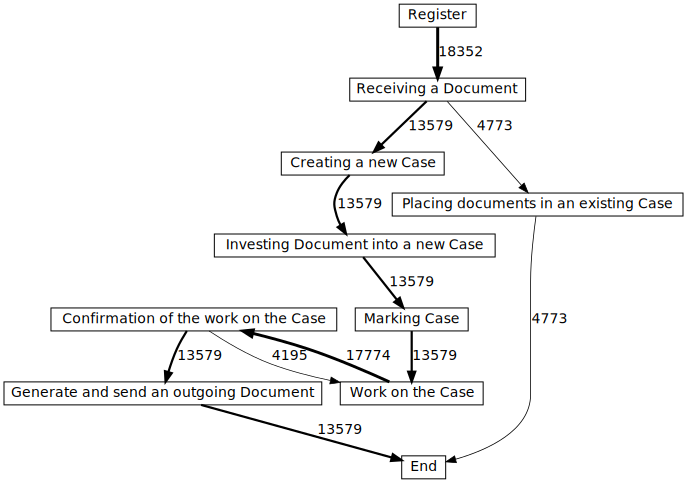

In [10]:
# Activity flow per activity
process_flow = sortnew[['Case', 'Start Event','End Event']]
process_flow = process_flow.groupby(['Start Event','End Event']).size()
process_flow = process_flow.to_frame(name='Weight').reset_index()
# newcountsort1

H = graphviz.Digraph(format='png')

H.attr(rankdir='TB', size='15')
H.attr('node', shape='rectangle', height='0.3',width='0.3', fontname="Sans Bold")
# g.node(str(i), **{'width':str(i), 'height':str(i)})
H.attr('edge', fontname="Sans Bold Italic")

max_node = 3
max_case_id = process_flow['Weight'].max()

nodelist2 = []
for idx, row in process_flow.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H.node(node22)
        nodelist2.append(node22)
        
    H.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
    
# H.render('Control_Flow', view=True)
H

In [11]:
process_flow

,Start Event,End Event,Weight
0,Confirmation of the work on the Case,Generate and send an outgoing Document,13579
1,Confirmation of the work on the Case,Work on the Case,4195
2,Creating a new Case,Investing Document into a new Case,13579
3,Generate and send an outgoing Document,End,13579
4,Investing Document into a new Case,Marking Case,13579
5,Marking Case,Work on the Case,13579
6,Placing documents in an existing Case,End,4773
7,Receiving a Document,Creating a new Case,13579
8,Receiving a Document,Placing documents in an existing Case,4773
9,Register,Receiving a Document,18352


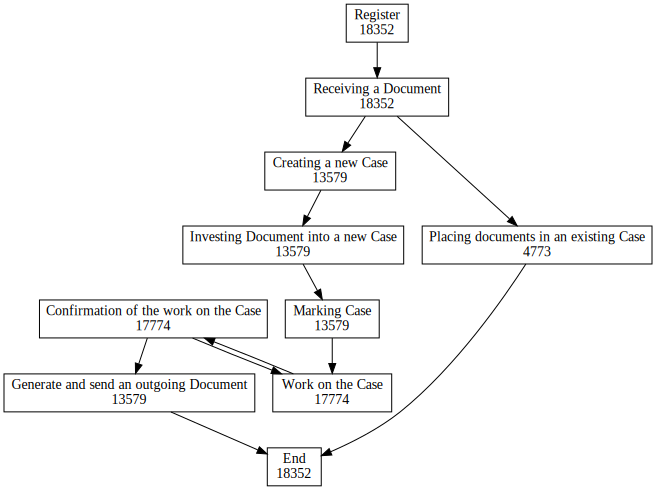

In [12]:
f = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='corleone')
# node_attr={'color': 'lightblue2', 'style': 'filled'}
f.attr('node', shape='box')

# create all the possible nodes first
# you can modify the `label` 

# for index, row in start_act.iterrows():
#     f.node(row['Start'],label=row['Start'] + '\n '+ str(row['Weight']))
#     f.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(row['Weight']))
# #     ,_attributes={'color':'red' if row['S']=='M' else 'lightblue2'})

# for index, row in start_act.iterrows():
#     f.edge(str(row["Start"]), str(row["First Activity"]), label="")
# #     f.edge(str(row["ParentID"]), str(row["ID"]), label='')

#####################################################

for index, row in process_flow.iterrows():
#     f.node(row['Start Event'],label=row['Start Event'] + '\n '+ str(row['Weight']))
    f.node(row['Start Event'],label=row['Start Event'] + '\n '+ str(process_flow[process_flow['Start Event'] == row['Start Event']]['Weight'].sum()))
#     f.node(row['End Event'],label=row['End Event'] + '\n '+ str(row['Weight']))
    f.node(row['End Event'],label=row['End Event'] + '\n '+ str(process_flow[process_flow['End Event'] == row['End Event']]['Weight'].sum()))
#     ,_attributes={'color':'red' if row['S']=='M' else 'lightblue2'})

for index, row in process_flow.iterrows():
    f.edge(str(row["Start Event"]), str(row["End Event"]), label="")
#     f.edge(str(row["ParentID"]), str(row["ID"]), label='')

######################################################
# for index, row in end_act.iterrows():
#     f.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(row['Weight']))
#     f.node(row['End'],label=row['End'] + '\n '+ str(row['Weight']))


# for index, row in end_act.iterrows():
#     f.edge(str(row["Last Activity"]), str(row["End"]), label="")


    
f

In [13]:
process_flow

,Start Event,End Event,Weight
0,Confirmation of the work on the Case,Generate and send an outgoing Document,13579
1,Confirmation of the work on the Case,Work on the Case,4195
2,Creating a new Case,Investing Document into a new Case,13579
3,Generate and send an outgoing Document,End,13579
4,Investing Document into a new Case,Marking Case,13579
5,Marking Case,Work on the Case,13579
6,Placing documents in an existing Case,End,4773
7,Receiving a Document,Creating a new Case,13579
8,Receiving a Document,Placing documents in an existing Case,4773
9,Register,Receiving a Document,18352


In [14]:
sortnewtimetest = sortnew.copy()
sortnewtimetest['Duration'] = sortnewtimetest['End Time'] - sortnewtimetest['Start Time']

#Average Time per activity
sortnewtimetest = sortnewtimetest[['Start Event','End Event','Duration']]
sortnewtimetest['Duration'] = sortnewtimetest['Duration'].apply(lambda x: round(x.total_seconds(),0))
sortnewtimetest = sortnewtimetest.groupby(['Start Event','End Event']).agg({'Duration': ['mean'],'Start Event':['count']}).reset_index()
sortnewtimetest.columns = ['Start Event','End Event', 'Duration', 'Count']
sortnewtimetest['Duration'] = round(sortnewtimetest['Duration']/60,2)
sortnewtimetest

,Start Event,End Event,Duration,Count
0,Confirmation of the work on the Case,Generate and send an outgoing Document,3.65,13579
1,Confirmation of the work on the Case,Work on the Case,2.75,4195
2,Creating a new Case,Investing Document into a new Case,12.83,13579
3,Generate and send an outgoing Document,End,6.17,13579
4,Investing Document into a new Case,Marking Case,18.03,13579
5,Marking Case,Work on the Case,3.24,13579
6,Placing documents in an existing Case,End,10.57,4773
7,Receiving a Document,Creating a new Case,6.86,13579
8,Receiving a Document,Placing documents in an existing Case,6.93,4773
9,Register,Receiving a Document,0.00,18352


In [16]:
events = {1:'Register',
2:'Receiving a Document',
3: 'Creating a new Case',
4:'Investing Document into a new Case',
5:'Marking Case',
6:'Work on the Case',
7:'Confirmation of the work on the Case',
8:'Generate and send an outgoing Document',
9:'Placing documents in an existing Case',
10:'End'}
events_table = pd.DataFrame(events.items(), columns=['No', 'Events'])
events_table

,No,Events
0,1,Register
1,2,Receiving a Document
2,3,Creating a new Case
3,4,Investing Document into a new Case
4,5,Marking Case
5,6,Work on the Case
6,7,Confirmation of the work on the Case
7,8,Generate and send an outgoing Document
8,9,Placing documents in an existing Case
9,10,End


In [17]:
# events_table.to_csv('Events_tableWR.csv', index=False)

In [18]:
rework_cases = sortnew[(sortnew['Start Event'] == 'Confirmation of the work on the Case') & (sortnew['End Event'] == 'Work on the Case')]
rework_cases = rework_cases[['Case']].reset_index(drop=True)
rework_cases['Rework'] = 'Reworked_cases'
rework_cases = sortnew.merge(rework_cases, on='Case')
rework_cases

,Case,Start Event,Start Time,Start User,Case_2,End Event,End Time,End User,Comparison,Rework
0,3,Register,2016-07-11 09:02:19,System,3,Receiving a Document,2016-07-11 09:02:19,group1,True,Reworked_cases
1,3,Receiving a Document,2016-07-11 09:02:19,group1,3,Creating a new Case,2016-07-11 09:04:39,group1,True,Reworked_cases
2,3,Creating a new Case,2016-07-11 09:04:39,group1,3,Investing Document into a new Case,2016-07-11 09:08:41,group2,True,Reworked_cases
3,3,Investing Document into a new Case,2016-07-11 09:08:41,group2,3,Marking Case,2016-07-11 09:12:34,group3,True,Reworked_cases
4,3,Marking Case,2016-07-11 09:12:34,group3,3,Work on the Case,2016-07-11 09:12:54,group4,True,Reworked_cases
...,...,...,...,...,...,...,...,...,...,...
41945,18343,Work on the Case,2016-08-31 17:04:19,group4,18343,Confirmation of the work on the Case,2016-08-31 17:11:25,group5,True,Reworked_cases
41946,18343,Confirmation of the work on the Case,2016-08-31 17:11:25,group5,18343,Work on the Case,2016-08-31 17:12:38,group4,True,Reworked_cases
41947,18343,Work on the Case,2016-08-31 17:12:38,group4,18343,Confirmation of the work on the Case,2016-08-31 17:20:16,group5,True,Reworked_cases
41948,18343,Confirmation of the work on the Case,2016-08-31 17:20:16,group5,18343,Generate and send an outgoing Document,2016-08-31 17:21:27,group6,True,Reworked_cases


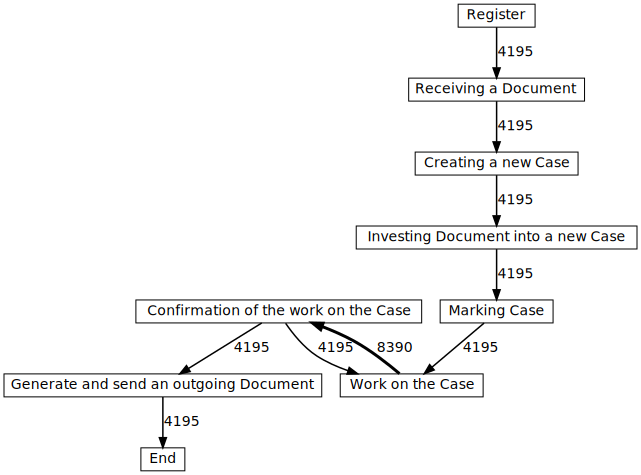

In [19]:
# Activity flow per activity
rework_cases_graph = rework_cases[['Case', 'Start Event','End Event']]
rework_cases_graph = rework_cases_graph.groupby(['Start Event','End Event']).size()
rework_cases_graph = rework_cases_graph.to_frame(name='Weight').reset_index()
# newcountsort1

H3 = graphviz.Digraph(format='png')

H3.attr(rankdir='TB', size='15')
H3.attr('node', shape='rectangle', height='0.3',width='0.3', fontname="Sans Bold")
# g.node(str(i), **{'width':str(i), 'height':str(i)})
H3.attr('edge', fontname="Sans Bold Italic")

max_node = 3
max_case_id = rework_cases_graph['Weight'].max()

nodelist2 = []
for idx, row in rework_cases_graph.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H3.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H3.node(node22)
        nodelist2.append(node22)
        
    H3.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
    
# H.render('Control_Flow', view=True)
H3

In [20]:
sortnew

,Case,Start Event,Start Time,Start User,Case_2,End Event,End Time,End User,Comparison
0,1,Register,2016-07-11 09:00:34,System,1,Receiving a Document,2016-07-11 09:00:34,group1,True
1,1,Receiving a Document,2016-07-11 09:00:34,group1,1,Creating a new Case,2016-07-11 09:02:27,group1,True
2,1,Creating a new Case,2016-07-11 09:02:27,group1,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,True
3,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,1,Marking Case,2016-07-11 09:12:48,group3,True
4,1,Marking Case,2016-07-11 09:12:48,group3,1,Work on the Case,2016-07-11 09:13:36,group4,True
...,...,...,...,...,...,...,...,...,...
149687,18352,Investing Document into a new Case,2016-08-31 17:07:41,group2,18352,Marking Case,2016-08-31 17:13:16,group3,True
149688,18352,Marking Case,2016-08-31 17:13:16,group3,18352,Work on the Case,2016-08-31 17:14:29,group4,True
149689,18352,Work on the Case,2016-08-31 17:14:29,group4,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,True
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,group6,True


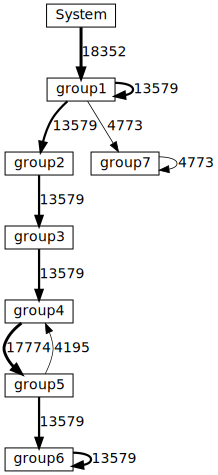

In [21]:
# Activity flow per activity
process_flow_user = sortnew[['Case', 'Start User','End User']]
process_flow_user = process_flow_user.groupby(['Start User','End User']).size()
process_flow_user = process_flow_user.to_frame(name='Weight').reset_index()
# newcountsort1

H1 = graphviz.Digraph(format='png')

H1.attr(rankdir='TB', size='15')
H1.attr('node', shape='rectangle', height='0.3',width='0.3', fontname="Sans Bold")
# g.node(str(i), **{'width':str(i), 'height':str(i)})
H1.attr('edge', fontname="Sans Bold Italic")

max_node = 3
max_case_id = process_flow_user['Weight'].max()

nodelist2 = []
for idx, row in process_flow_user.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H1.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H1.node(node22)
        nodelist2.append(node22)
        
    H1.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
    
# H.render('Control_Flow', view=True)
H1

In [22]:
process_flow_user

,Start User,End User,Weight
0,System,group1,18352
1,group1,group1,13579
2,group1,group2,13579
3,group1,group7,4773
4,group2,group3,13579
5,group3,group4,13579
6,group4,group5,17774
7,group5,group4,4195
8,group5,group6,13579
9,group6,group6,13579


In [24]:
# Variants
variants = df_sort.copy()
variants['count'] = variants.groupby('case').cumcount()+1
variants = variants.pivot(index='case', columns='count', values='event')
variants_col = variants.columns
variants = variants.fillna('X')
variants = variants.astype('str')
variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
variants

count,1,2,3,4,5,6,7,8,9,10,11,Trace
case,,,,,,,,,,,,
1,Register,Receiving a Document,Creating a new Case,Investing Document into a new Case,Marking Case,Work on the Case,Confirmation of the work on the Case,Generate and send an outgoing Document,End,X,X,"Register,Receiving a Document,Creating a new C..."
2,Register,Receiving a Document,Creating a new Case,Investing Document into a new Case,Marking Case,Work on the Case,Confirmation of the work on the Case,Generate and send an outgoing Document,End,X,X,"Register,Receiving a Document,Creating a new C..."
3,Register,Receiving a Document,Creating a new Case,Investing Document into a new Case,Marking Case,Work on the Case,Confirmation of the work on the Case,Work on the Case,Confirmation of the work on the Case,Generate and send an outgoing Document,End,"Register,Receiving a Document,Creating a new C..."
4,Register,Receiving a Document,Creating a new Case,Investing Document into a new Case,Marking Case,Work on the Case,Confirmation of the work on the Case,Work on the Case,Confirmation of the work on the Case,Generate and send an outgoing Document,End,"Register,Receiving a Document,Creating a new C..."
5,Register,Receiving a Document,Creating a new Case,Investing Document into a new Case,Marking Case,Work on the Case,Confirmation of the work on the Case,Generate and send an outgoing Document,End,X,X,"Register,Receiving a Document,Creating a new C..."
...,...,...,...,...,...,...,...,...,...,...,...,...
18348,Register,Receiving a Document,Placing documents in an existing Case,End,X,X,X,X,X,X,X,"Register,Receiving a Document,Placing document..."
18349,Register,Receiving a Document,Creating a new Case,Investing Document into a new Case,Marking Case,Work on the Case,Confirmation of the work on the Case,Generate and send an outgoing Document,End,X,X,"Register,Receiving a Document,Creating a new C..."
18350,Register,Receiving a Document,Placing documents in an existing Case,End,X,X,X,X,X,X,X,"Register,Receiving a Document,Placing document..."


In [25]:
variants_num = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
del variants_num['index']
variants_num = variants_num.reset_index()
variants_num['index'] = variants_num['index']+1
variants_num = variants_num.rename(columns={'index':'Variants',1:'No of occurance'})
variants_num

count,Variants,Trace,No of occurance
0,1,"Register,Receiving a Document,Creating a new C...",9384
1,2,"Register,Receiving a Document,Placing document...",4773
2,3,"Register,Receiving a Document,Creating a new C...",4195


In [26]:
df_case = df_sort.copy()
df_case['count'] = df_case.groupby('case').cumcount() + 1
df_case = df_case.pivot(index='case', columns='count',values='startTime')
df_case['Max'] = df_case.apply(max, axis=1)
df_case['Case_Duration'] = df_case['Max'] - df_case[1]
df_case = df_case.drop(variants_col, axis=1)
df_case = df_case.reset_index()
df_case

count,case,Max,Case_Duration
0,1,2016-07-11 09:23:13,0 days 00:22:39
1,2,2016-07-11 09:24:03,0 days 00:23:04
2,3,2016-07-11 09:30:00,0 days 00:27:41
3,4,2016-07-11 09:32:09,0 days 00:29:00
4,5,2016-07-11 09:23:23,0 days 00:20:06
...,...,...,...
18347,18348,2016-08-31 17:02:17,0 days 00:05:45
18348,18349,2016-08-31 17:20:53,0 days 00:24:09
18349,18350,2016-08-31 17:06:13,0 days 00:07:13
18350,18351,2016-08-31 17:21:51,0 days 00:20:13


In [27]:
df_piv_2 = df_sort.copy()
df_piv_2['count'] = df_piv_2.groupby('case').cumcount()+1
df_piv_2 = df_piv_2.pivot(index='case', columns='count', values='event')


def last_activity(a):
    if a.last_valid_index() is None:
        return np.nan
    else:
        return a[a.last_valid_index()]

df_piv_2['Last_Event'] = df_piv_2.apply(last_activity, axis=1)
df_piv_2['First_Event'] = df_piv_2[1]
df_piv_2 = df_piv_2.drop(variants_col, axis=1)
df_piv_2  = df_piv_2.reset_index()
df_piv_2

count,case,Last_Event,First_Event
0,1,End,Register
1,2,End,Register
2,3,End,Register
3,4,End,Register
4,5,End,Register
...,...,...,...
18347,18348,End,Register
18348,18349,End,Register
18349,18350,End,Register
18350,18351,End,Register


In [28]:
var_finale = variants.merge(df_piv_2, on='case')
var_finale = var_finale.drop(variants_col, axis=1)
var_finale = var_finale.merge(df_case, on='case').drop(['Max'], axis=1)
var_finale = var_finale.merge(variants_num, on='Trace').drop(['No of occurance','Trace'], axis=1)
var_finale['Case_Duration'] = var_finale['Case_Duration'].apply(lambda x: round(x.total_seconds(),0))
var_finale['Case_Duration in minutes'] = round(var_finale['Case_Duration']/60,2)
var_finale

count,case,Last_Event,First_Event,Case_Duration,Variants,Case_Duration in minutes
0,1,End,Register,1359.0,1,22.65
1,2,End,Register,1384.0,1,23.07
2,5,End,Register,1206.0,1,20.10
3,7,End,Register,1283.0,1,21.38
4,8,End,Register,1110.0,1,18.50
...,...,...,...,...,...,...
18347,18342,End,Register,369.0,2,6.15
18348,18344,End,Register,354.0,2,5.90
18349,18346,End,Register,329.0,2,5.48
18350,18348,End,Register,345.0,2,5.75


In [29]:
sortnew2 = sortnew.copy()
sortnew2['Duration'] = sortnew2['End Time'] - sortnew2['Start Time']
sortnew2['Duration'] = sortnew2['Duration'].apply(lambda x: round(x.total_seconds(),0))
sortnew2['Duration in minutes'] = round(sortnew2['Duration']/60,2)
sortnew2

,Case,Start Event,Start Time,Start User,Case_2,End Event,End Time,End User,Comparison,Duration,Duration in minutes
0,1,Register,2016-07-11 09:00:34,System,1,Receiving a Document,2016-07-11 09:00:34,group1,True,0.0,0.00
1,1,Receiving a Document,2016-07-11 09:00:34,group1,1,Creating a new Case,2016-07-11 09:02:27,group1,True,113.0,1.88
2,1,Creating a new Case,2016-07-11 09:02:27,group1,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,True,234.0,3.90
3,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,1,Marking Case,2016-07-11 09:12:48,group3,True,387.0,6.45
4,1,Marking Case,2016-07-11 09:12:48,group3,1,Work on the Case,2016-07-11 09:13:36,group4,True,48.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...
149687,18352,Investing Document into a new Case,2016-08-31 17:07:41,group2,18352,Marking Case,2016-08-31 17:13:16,group3,True,335.0,5.58
149688,18352,Marking Case,2016-08-31 17:13:16,group3,18352,Work on the Case,2016-08-31 17:14:29,group4,True,73.0,1.22
149689,18352,Work on the Case,2016-08-31 17:14:29,group4,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,True,504.0,8.40
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,group6,True,73.0,1.22


In [30]:
# sortnew2.to_csv('Timing_details.csv', index=False)
# var_finale.to_csv('Variants.csv', index=False)

In [31]:
# df_sort.to_csv('Updated_Event_Log.csv', index=False)

In [32]:
df_sort

,case,event,startTime,completeTime,description,org:resource
0,1,Register,2016-07-11 09:00:34,2016-07-11 09:00:34,Real process instance,System
1,1,Receiving a Document,2016-07-11 09:00:34,2016-07-11 09:02:27,Real process instance,group1
2,1,Creating a new Case,2016-07-11 09:02:27,2016-07-11 09:06:21,Real process instance,group1
3,1,Investing Document into a new Case,2016-07-11 09:06:21,2016-07-11 09:12:48,Real process instance,group2
4,1,Marking Case,2016-07-11 09:12:48,2016-07-11 09:13:36,Real process instance,group3
...,...,...,...,...,...,...
149688,18352,Marking Case,2016-08-31 17:13:16,2016-08-31 17:14:29,Real process instance,group3
149689,18352,Work on the Case,2016-08-31 17:14:29,2016-08-31 17:22:53,Real process instance,group4
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,2016-08-31 17:24:06,Real process instance,group5
149691,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,2016-08-31 17:26:37,Real process instance,group6


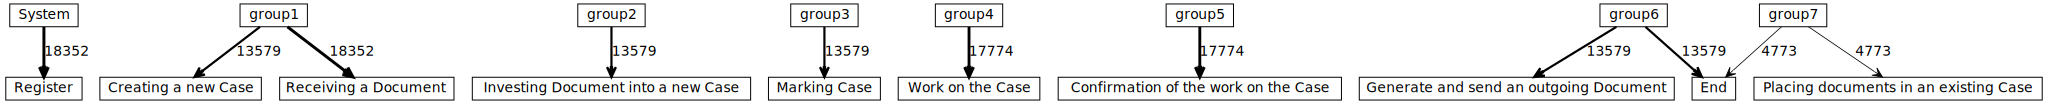

In [33]:
# Individual activities per user
iapu = df_sort.copy()
iapu = iapu[['org:resource','event']]
iapu = iapu.groupby(['org:resource','event']).size()
iapu = iapu.to_frame(name='Weight').reset_index()
# iapu

ZA = graphviz.Digraph(format='png')

ZA.attr(rankdir='TB')
ZA.attr('node', shape='rectangle', height='0.3',width='0.3', fontname="Sans Bold")
ZA.attr('edge', arrowhead='vee', arrowtail='inv',fontname="Sans Bold Italic")

# ZA.attr('node', shape='circle')
# ZA.attr('edge', arrowhead='vee', arrowtail='inv')

max_node = 3
max_case_id = iapu['Weight'].max()
nodelist2 = []
for idx, row in iapu.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        ZA.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        ZA.node(node22)
        nodelist2.append(node22)
        
    ZA.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
# ZA.render('Work distribution', view=True)
ZA

In [35]:
process_new = new_rework[['case','new_event','startTime','org:resource']]
process_new

,case,new_event,startTime,org:resource
0,1,Register,2016-07-11 09:00:34,System
1,1,Receiving a Document,2016-07-11 09:00:34,group1
2,1,Creating a new Case,2016-07-11 09:02:27,group1
3,1,Investing Document into a new Case,2016-07-11 09:06:21,group2
4,1,Marking Case,2016-07-11 09:12:48,group3
...,...,...,...,...
149688,18352,Marking Case,2016-08-31 17:13:16,group3
149689,18352,Work on the Case,2016-08-31 17:14:29,group4
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5
149691,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,group6


In [36]:
sort1_new = process_new.iloc[:-1,:]
sort2_new = process_new.iloc[1:,:].reset_index(drop=True)
sortnew_new = pd.concat([sort1_new,sort2_new],axis=1)

sortnew_new.columns = ['Case','Start Event','Start Time','Start User','Case_2','End Event','End Time','End User']
sortnew_new['Comparison'] = sortnew_new.apply(lambda x: True if x['Case'] == x['Case_2'] else False,axis=1)
sortnew_new = sortnew_new[sortnew_new['Comparison'] == True]
sortnew_new

,Case,Start Event,Start Time,Start User,Case_2,End Event,End Time,End User,Comparison
0,1,Register,2016-07-11 09:00:34,System,1,Receiving a Document,2016-07-11 09:00:34,group1,True
1,1,Receiving a Document,2016-07-11 09:00:34,group1,1,Creating a new Case,2016-07-11 09:02:27,group1,True
2,1,Creating a new Case,2016-07-11 09:02:27,group1,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,True
3,1,Investing Document into a new Case,2016-07-11 09:06:21,group2,1,Marking Case,2016-07-11 09:12:48,group3,True
4,1,Marking Case,2016-07-11 09:12:48,group3,1,Work on the Case,2016-07-11 09:13:36,group4,True
...,...,...,...,...,...,...,...,...,...
149687,18352,Investing Document into a new Case,2016-08-31 17:07:41,group2,18352,Marking Case,2016-08-31 17:13:16,group3,True
149688,18352,Marking Case,2016-08-31 17:13:16,group3,18352,Work on the Case,2016-08-31 17:14:29,group4,True
149689,18352,Work on the Case,2016-08-31 17:14:29,group4,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,True
149690,18352,Confirmation of the work on the Case,2016-08-31 17:22:53,group5,18352,Generate and send an outgoing Document,2016-08-31 17:24:06,group6,True


In [38]:
process33 = sortnew_new.copy()
process33['Duration'] = (process33['End Time'] - process33['Start Time'])

process33['Duration'] = pd.to_timedelta(process33['Duration'])/pd.Timedelta('60s')

process33 = process33[['Start Event','End Event','Duration']]
process33 = process33.groupby(['Start Event','End Event']).agg({'Duration': ['median'],'Start Event':['count']}).reset_index()
process33.columns = ['Start Event','End Event', 'Duration', 'Weight']
process33['Duration'] = round(process33['Duration'],0)
process33['Duration'] = process33['Duration'].astype('int')

process33

,Start Event,End Event,Duration,Weight
0,Confirmation of the work on the Case,Generate and send an outgoing Document,1,9384
1,Confirmation of the work on the Case,Work on the Case Rework,1,4195
2,Confirmation of the work on the Case Rework,Generate and send an outgoing Document,1,4195
3,Creating a new Case,Investing Document into a new Case,4,13579
4,Generate and send an outgoing Document,End,2,13579
5,Investing Document into a new Case,Marking Case,5,13579
6,Marking Case,Work on the Case,1,13579
7,Placing documents in an existing Case,End,3,4773
8,Receiving a Document,Creating a new Case,2,13579
9,Receiving a Document,Placing documents in an existing Case,2,4773


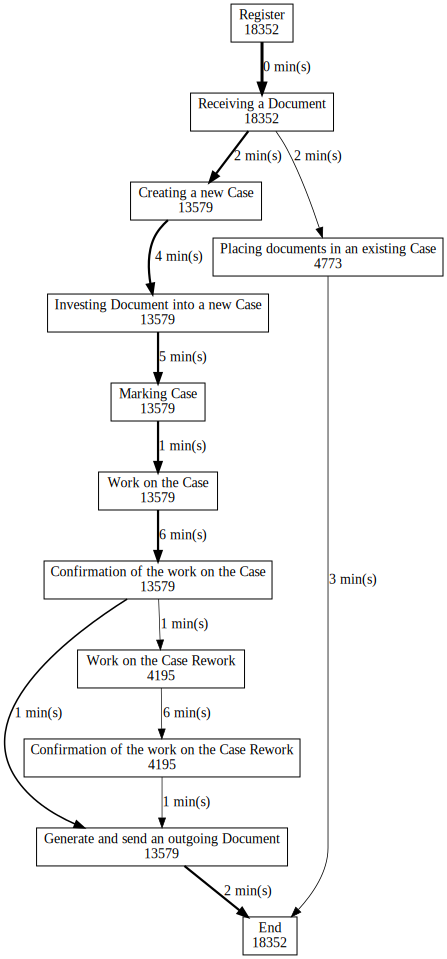

In [39]:
f1 = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='corleone')
f1.attr('node', shape='box')

max_node = 3
max_case_id = process33['Weight'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in process33.iterrows():
    f1.node(row['Start Event'],label=row['Start Event'] + '\n '+ str(process33[process33['Start Event'] == row['Start Event']]['Weight'].sum()))
    f1.node(row['End Event'],label=row['End Event'] + '\n '+ str(process33[process33['End Event'] == row['End Event']]['Weight'].sum()))

for index, row in process33.iterrows():
    f1.edge(str(row["Start Event"]), str(row["End Event"]), label=" " + str(row["Duration"]) + " min(s)", penwidth=str(int(row["Weight"])/max_case_id*max_node))

    
f1

In [40]:
process_flow_new

,Start Event,End Event,Weight
0,Confirmation of the work on the Case,Generate and send an outgoing Document,9384
1,Confirmation of the work on the Case,Work on the Case Rework,4195
2,Confirmation of the work on the Case Rework,Generate and send an outgoing Document,4195
3,Creating a new Case,Investing Document into a new Case,13579
4,Generate and send an outgoing Document,End,13579
5,Investing Document into a new Case,Marking Case,13579
6,Marking Case,Work on the Case,13579
7,Placing documents in an existing Case,End,4773
8,Receiving a Document,Creating a new Case,13579
9,Receiving a Document,Placing documents in an existing Case,4773


In [41]:
# process_new.to_csv('Adjusted_event_log.csv', index=False)

In [43]:
events_new = {1:'Register',
2:'Receiving a Document',
3: 'Creating a new Case',
4:'Investing Document into a new Case',
5:'Marking Case',
6:'Work on the Case',
7:'Confirmation of the work on the Case',
8:'Work on the Case Rework',
9:'Confirmation of the work on the Case Rework',
10:'Generate and send an outgoing Document',
11:'Placing documents in an existing Case',
12:'End'}
events_table_new = pd.DataFrame(events_new.items(), columns=['No', 'Events'])
events_table_new

,No,Events
0,1,Register
1,2,Receiving a Document
2,3,Creating a new Case
3,4,Investing Document into a new Case
4,5,Marking Case
5,6,Work on the Case
6,7,Confirmation of the work on the Case
7,8,Work on the Case Rework
8,9,Confirmation of the work on the Case Rework
9,10,Generate and send an outgoing Document


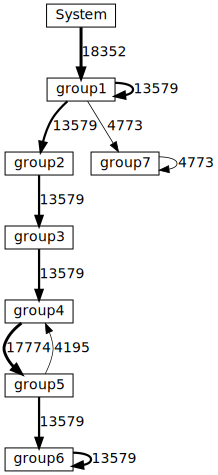

In [45]:
# Activity flow per activity
process_flow_user = sortnew_new[['Case', 'Start User','End User']]
process_flow_user = process_flow_user.groupby(['Start User','End User']).size()
process_flow_user = process_flow_user.to_frame(name='Weight').reset_index()
# newcountsort1

H1 = graphviz.Digraph(format='png')

H1.attr(rankdir='TB', size='15')
H1.attr('node', shape='rectangle', height='0.3',width='0.3', fontname="Sans Bold")
# g.node(str(i), **{'width':str(i), 'height':str(i)})
H1.attr('edge', fontname="Sans Bold Italic")

max_node = 3
max_case_id = process_flow_user['Weight'].max()

nodelist2 = []
for idx, row in process_flow_user.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H1.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H1.node(node22)
        nodelist2.append(node22)
        
    H1.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
    
# H.render('Control_Flow', view=True)
H1

In [46]:
# new_rework.to_csv('Adjusted_event_log2.csv', index=False)